In [1]:
##Importing Required Libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score,roc_curve,auc
import pickle

In [2]:
import pandas as pd
data=pd.read_csv('final_dataset.csv')
data.head()
# having a glance at data 

,Unnamed: 0,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5,0
1,1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9,0
2,2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9,0
3,3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0,0
4,4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5,0


In [3]:
# Removing unnecessary column named "Unnamed: 0"
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()
#checking whether it is droped or not!

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5,0
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9,0
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9,0
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5,0


In [4]:
data.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
count,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,0.629263,0.668914,-6.899446,0.098110,0.221021,0.040536,0.181063,0.528754,121.364623,6.206657,0.173486
std,0.154437,0.202883,3.262754,0.097514,0.267346,0.150758,0.144034,0.239518,28.657971,1.834390,0.378689
min,0.061700,0.002890,-36.729000,0.022800,0.000001,0.000000,0.011900,0.024600,46.591000,0.000000,0.000000
25%,0.530000,0.535000,-8.307250,0.037000,0.017300,0.000000,0.092800,0.342000,98.523750,6.000000,0.000000
50%,0.638000,0.700000,-6.142000,0.054150,0.099850,0.000005,0.123000,0.526000,120.027500,6.000000,0.000000
75%,0.741000,0.831000,-4.696750,0.114000,0.335000,0.000778,0.228000,0.721250,139.929250,7.000000,0.000000
max,0.981000,0.997000,1.342000,0.869000,0.996000,0.982000,0.986000,0.982000,216.115000,9.000000,1.000000


In [5]:
# Checkinng shape of dataset
data.shape

(8652, 11)

In [6]:
data.info

<bound method DataFrame.info of       Danceability  Energy  Loudness  Speechiness  Acousticness  \
0            0.556   0.864    -5.870       0.0584      0.009580   
1            0.737   0.463    -7.828       0.0792      0.008170   
2            0.618   0.938    -3.442       0.0456      0.017900   
3            0.331   0.943    -3.188       0.0698      0.007210   
4            0.589   0.890    -3.719       0.0603      0.000481   
...            ...     ...       ...          ...           ...   
8647         0.783   0.840    -3.416       0.0510      0.174000   
8648         0.669   0.308   -10.068       0.0290      0.883000   
8649         0.544   0.781    -6.160       0.0311      0.005850   
8650         0.713   0.831    -4.750       0.1500      0.016800   
8651         0.836   0.544    -5.975       0.0943      0.040300   

      Instrumentalness  Liveness  Valence    Tempo  Genre  Top100  
0             0.000000    0.2090    0.400  105.143      5       0  
1             0.447000    0

<AxesSubplot:xlabel='Top100', ylabel='count'>

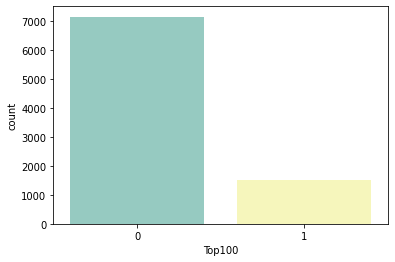

In [7]:
# Plotting graph of Top100
sns.countplot(x="Top100",data=data,palette="Set3")

In [8]:
data['Top100'].value_counts()

0    7151
1    1501
Name: Top100, dtype: int64

In [9]:
# Splitting the data into X and y
X=data.drop("Top100",axis=1)    # excluding output column
y=data["Top100"]

In [10]:
X.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5


In [11]:
X.shape

(8652, 10)

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Top100, dtype: int64

In [13]:
y.shape

(8652,)

In [14]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.19041-SP0
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy 1.21.1
SciPy 1.6.2
Scikit-Learn 0.24.2


In [15]:
# Applying SMOTE: to balance the dataset

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(X,y)
X_sm.shape,y_sm.shape 

((14302, 10), (14302,))

In [16]:
# Checking the shape again after applying smote
X_sm.shape,y_sm.shape

((14302, 10), (14302,))

In [17]:
data.columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre', 'Top100'],
      dtype='object')

In [18]:
column=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre']
X_balance=pd.DataFrame(X_sm,columns=column)
X_balance.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5


In [19]:
X_balance.shape

(14302, 10)

In [20]:
# MinMax scaler to scale our data , since we can see that there can be units difference
scaling=MinMaxScaler()
X_scaled=scaling.fit_transform(X_sm)

In [21]:
column=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre']
X_final=pd.DataFrame(X_scaled,columns=column)
X_final.head(2)

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.537692,0.866212,0.810564,0.042070,0.009617,0.000000,0.202341,0.392104,0.345391,0.555556
1,0.734581,0.462836,0.759134,0.066651,0.008202,0.455193,0.249564,0.312722,0.455924,1.000000


In [22]:
X_final.shape

(14302, 10)

In [23]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X_final, y_sm, train_size = 0.8, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(11441, 10)
(2861, 10)
(11441,)
(2861,)


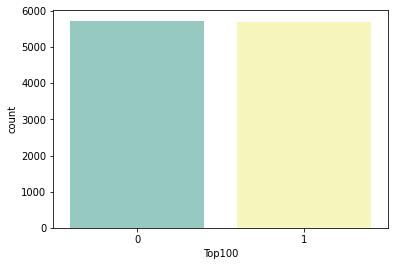

In [24]:
#plotting graph again to check for balanced datset
ax = sns.countplot(x = y_train, palette = "Set3")

## **KNN** 

In [25]:
#create KNN object 
knn = KNeighborsClassifier(n_neighbors=10)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
#Predict test data set.
y_pred = knn.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 950,  467],
       [ 229, 1215]], dtype=int64)

In [29]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1417
           1       0.72      0.84      0.78      1444

    accuracy                           0.76      2861
   macro avg       0.76      0.76      0.75      2861
weighted avg       0.76      0.76      0.75      2861



In [30]:
print(accuracy_score(y_test,y_pred)*100)

75.67284166375393


In [31]:
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

0.7559216146632599

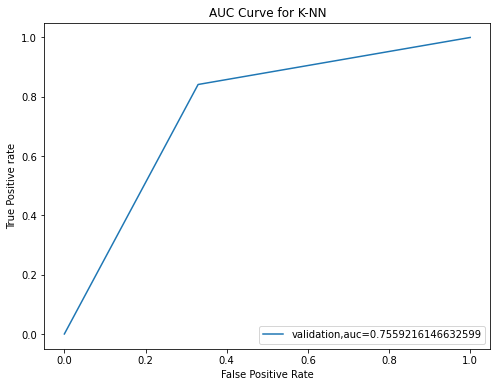

In [32]:
from sklearn import metrics
fpr,tpr,_= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('AUC Curve for K-NN')
plt.legend(loc=4)
plt.show()

##**Hyperparameter Tuning for K-NN**

In [33]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,10,15,18,20,25,30],
                'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan']}

In [34]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 2, cv=10, n_jobs = -1)

In [35]:
g_res = gs.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


In [36]:
print(gs.best_estimator_,'\n')
print(gs.best_params_,'\n')
y_gs=gs.predict(X_test)
print(accuracy_score(y_test,y_gs)*100)

KNeighborsClassifier(metric='manhattan', weights='distance') 

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'} 

79.44774554351626


In [37]:
print(classification_report(y_test, y_gs))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1417
           1       0.74      0.93      0.82      1444

    accuracy                           0.79      2861
   macro avg       0.82      0.79      0.79      2861
weighted avg       0.82      0.79      0.79      2861



In [38]:
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_gs)

0.7932253678619533

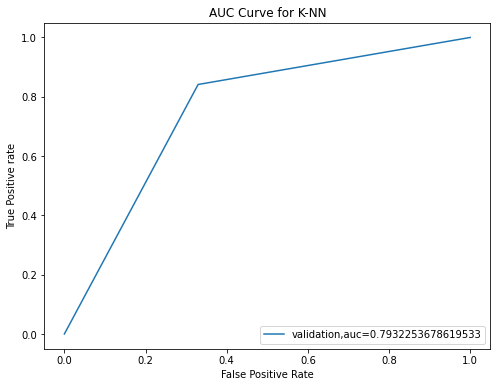

In [39]:
from sklearn import metrics
fpr,tpr,_= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_gs)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('AUC Curve for K-NN')
plt.legend(loc=4)
plt.show()

## **LDA**  - Linear Discriminant Analysis

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda_pred = lda.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lda_pred)

array([[ 826,  591],
       [ 334, 1110]], dtype=int64)

In [42]:
#Checking performance our model with classification report.
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1417
           1       0.65      0.77      0.71      1444

    accuracy                           0.68      2861
   macro avg       0.68      0.68      0.67      2861
weighted avg       0.68      0.68      0.67      2861



In [43]:
#Accuracy score
print(accuracy_score(y_test,lda_pred)*100)

67.66864732610975


In [44]:
#Checking performance our model with ROC Score.
roc_auc_score(y_test, lda_pred)

0.6758098632161504

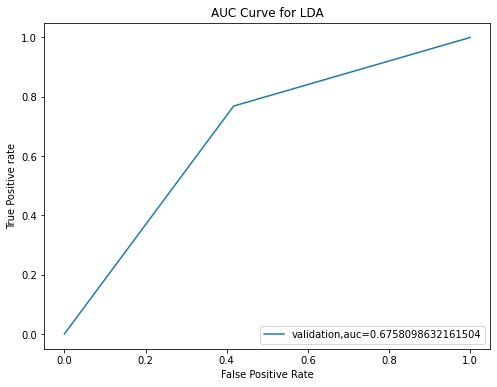

In [45]:
from sklearn import metrics
fpr,tpr,_= metrics.roc_curve(y_test,lda_pred)
auc=metrics.roc_auc_score(y_test,lda_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title("AUC Curve for LDA")
plt.legend(loc=4)
plt.show()

In [46]:
pickle.dump(gs.best_estimator_, open('model.pkl','wb'))

In [47]:
model=pickle.load(open('model.pkl','rb'))

In [48]:
model

KNeighborsClassifier(metric='manhattan', weights='distance')

In [49]:
#import joblib
#pickle_out=open("knn_flask.pkl","wb")
#joblib.dump(gs.best_estimator_,"gs.best_estimator_.pkl")

In [50]:
#loaded_model=joblib.load(open("gs.best_estimator_.pkl","rb"))
#loaded_model